In [1]:
#Import neccessary libraries
import pandas as pd
import numpy as np
import os

In [2]:
# Import packages for data visualization
import matplotlib.pyplot as plt

In [3]:
# This lets us see all of the columns, preventing Jupyter from redacting them.
pd.set_option('display.max_columns', None)

In [4]:
# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.preprocessing import MinMaxScaler

import shap

In [5]:
from sklearn.ensemble import RandomForestClassifier

from catboost import CatBoostClassifier


# This module lets us save our models once we fit them.
import pickle


In [6]:
# Import dataset
filepath = os.path.join('..', 'datasets', 'brand_care.csv')
df0 = pd.read_csv(filepath)

In [7]:
# Inspect the first five rows
df0.head()

,employee_id,company_mvv_understanding,company_mvv_aplying,others_opinion_for_company,company_superiority,company_offer,company_constant_visual_image,company_expectation_from_employee,customers_expectation_from_employee,customer_perception_attitude,sales_dep,marketing_dep,services_dep,finance_dep,target
0,1,5,5,3,3,5,5,5,5,4,1,0,0,0,1
1,2,5,5,5,4,5,5,5,5,3,1,0,0,0,1
2,3,5,4,5,3,5,3,5,5,5,1,0,0,0,1
3,4,5,5,3,5,3,5,5,5,4,1,0,0,0,1
4,5,3,5,5,3,5,4,5,5,3,1,0,0,0,1


In [8]:
# Copy the source df0 dataframe
df = df0.copy()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   employee_id                          1000 non-null   int64
 1   company_mvv_understanding            1000 non-null   int64
 2   company_mvv_aplying                  1000 non-null   int64
 3   others_opinion_for_company           1000 non-null   int64
 4   company_superiority                  1000 non-null   int64
 5   company_offer                        1000 non-null   int64
 6   company_constant_visual_image        1000 non-null   int64
 7   company_expectation_from_employee    1000 non-null   int64
 8   customers_expectation_from_employee  1000 non-null   int64
 9   customer_perception_attitude         1000 non-null   int64
 10  sales_dep                            1000 non-null   int64
 11  marketing_dep                        1000 non-null   int6

In [10]:
df.head(20)

,employee_id,company_mvv_understanding,company_mvv_aplying,others_opinion_for_company,company_superiority,company_offer,company_constant_visual_image,company_expectation_from_employee,customers_expectation_from_employee,customer_perception_attitude,sales_dep,marketing_dep,services_dep,finance_dep,target
0,1,5,5,3,3,5,5,5,5,4,1,0,0,0,1
1,2,5,5,5,4,5,5,5,5,3,1,0,0,0,1
2,3,5,4,5,3,5,3,5,5,5,1,0,0,0,1
3,4,5,5,3,5,3,5,5,5,4,1,0,0,0,1
4,5,3,5,5,3,5,4,5,5,3,1,0,0,0,1
5,6,5,4,5,5,4,5,4,5,4,1,0,0,0,1
6,7,4,4,4,5,5,4,5,5,5,1,0,0,0,1
7,8,5,5,5,4,5,4,4,5,5,1,0,0,0,1
8,9,5,5,4,5,4,4,4,5,4,1,0,0,0,1
9,10,5,5,4,5,3,5,5,5,5,1,0,0,0,1


In [11]:
# Drop `ID` column
df = df.drop(columns=['employee_id'])
df.head()

,company_mvv_understanding,company_mvv_aplying,others_opinion_for_company,company_superiority,company_offer,company_constant_visual_image,company_expectation_from_employee,customers_expectation_from_employee,customer_perception_attitude,sales_dep,marketing_dep,services_dep,finance_dep,target
0,5,5,3,3,5,5,5,5,4,1,0,0,0,1
1,5,5,5,4,5,5,5,5,3,1,0,0,0,1
2,5,4,5,3,5,3,5,5,5,1,0,0,0,1
3,5,5,3,5,3,5,5,5,4,1,0,0,0,1
4,3,5,5,3,5,4,5,5,3,1,0,0,0,1


In [12]:
# Get class balance of 'target' col
df['target'].value_counts(normalize=True)

target
1    0.763
0    0.237
Name: proportion, dtype: float64

In [13]:
# 1. Isolate X variables
X = df.drop(columns=['target'])

# 2. Isolate y variable
y = df['target']

# 3. Split into train and test sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y,
                                              test_size=0.15, random_state=42)

# 4. Split into train and validate sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr,
                                                  test_size=0.17, random_state=42)

In [14]:
for x in [X_train, X_val, X_test]:
    print(len(x))

705
145
150


In [15]:
# Min-Max Scaling
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_train = X_train_scaled

X_val_scaled = scaler.transform(X_val)
X_val = X_val_scaled

X_test_scaled = scaler.transform(X_test)
X_test = X_test_scaled

In [16]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [9],
             'max_features': [1.0],
             'max_samples': [1.0],
             'min_samples_leaf': [0.002],
             'min_samples_split': [0.001],
             'n_estimators': [300],
}

# 3. Define a list of scoring metrics to capture
scoring = {
    'f1_macro': 'f1_macro',
    'f1_weighted': 'f1_weighted',
    'recall_macro': 'recall_macro',
    'roc_auc_ovr': 'roc_auc_ovr'
}

# 4. Define StratifiedKFold for cross-validation
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# 5. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=skf, n_jobs=-1, refit='roc_auc_ovr')

In [17]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: total: 672 ms
Wall time: 4.79 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [9], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [0.002],
                         'min_samples_split': [0.001], 'n_estimators': [300]},
             refit='roc_auc_ovr',
             scoring={'f1_macro': 'f1_macro', 'f1_weighted': 'f1_weighted',
                      'recall_macro': 'recall_macro',
                      'roc_auc_ovr': 'roc_auc_ovr'})

In [18]:
# Examine best score
print("roc_auc_ovr=", rf_cv.best_score_)

roc_auc_ovr= 0.9440596484668319


In [19]:
# Examine best hyperparameter combo
rf_cv.best_params_

{'max_depth': 9,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 0.002,
 'min_samples_split': 0.001,
 'n_estimators': 300}

In [20]:
best_rf = rf_cv.best_estimator_

importances = best_rf.feature_importances_

feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance(%)': np.round(importances * 100,2)
}).sort_values(by='Importance(%)', ascending=False)

feature_importance_rf.head(16)

,Feature,Importance(%)
1,company_mvv_aplying,20.20
0,company_mvv_understanding,17.42
4,company_offer,15.32
6,company_expectation_from_employee,10.12
7,customers_expectation_from_employee,9.50
5,company_constant_visual_image,6.50
8,customer_perception_attitude,5.95
3,company_superiority,5.81
2,others_opinion_for_company,3.99
11,services_dep,1.62


In [21]:
def shap_to_probability_delta(shap_val, base_value=0.0):
    return 1 / (1 + np.exp(-(base_value + shap_val))) - 1 / (1 + np.exp(-base_value))

In [22]:
# Create SHAP explainer
explainer = shap.TreeExplainer(rf_cv.best_estimator_)
shap_values = explainer.shap_values(X_train)  # Get SHAP values for all features

# Extract SHAP values for class 1 (positive class) from shap_values[1]
# This assumes shap_values[1] is of shape (n_samples, n_features) for class 1 (positive class).
shap_values_class_1 = shap_values[:, :, 1]

# Compute the mean SHAP value per feature (across all samples)
mean_shap_values = np.mean(shap_values_class_1, axis=0)  # Mean SHAP value per feature for positive class

# Compute mean absolute SHAP values per feature
mean_abs_shap_values = np.mean(np.abs(shap_values_class_1), axis=0)  # Mean absolute SHAP values per feature

# Direction: 'Increases' if the mean SHAP value for a feature is positive, 'Decreases' otherwise
direction = ['Inc.' if val > 0 else 'Dec.' for val in mean_shap_values]

# Binning the impact into categories (Low, Medium, High) based on quantiles of the mean absolute SHAP values
impact_strength = pd.qcut(mean_abs_shap_values, q=3, labels=["Low", "Medium", "High"])

# Create a DataFrame to summarize the SHAP values for each feature
shap_summary_df = pd.DataFrame({
'Feature': X.columns,  # Features in the dataset
'Imp. %': np.round(shap_to_probability_delta(mean_abs_shap_values)*100, 1),  # Impact percentage for each feature
'Imp. Direct.': direction,  # Impact direction based on mean SHAP values
'Imp. Strength': impact_strength  # Categorized impact strength (Low, Medium, High)
}).sort_values(by=['Imp. Direct.', 'Imp. %'], ascending=False).reset_index(drop=True)

# Save the SHAP summary to Excel for further inspection
shap_summary_df.to_excel('bc_shap_summary_rf.xlsx', index=False)

# Display the summary DataFrame
shap_summary_df

,Feature,Imp. %,Imp. Direct.,Imp. Strength
0,company_offer,2.2,Inc.,High
1,customers_expectation_from_employee,1.7,Inc.,High
2,company_expectation_from_employee,1.4,Inc.,High
3,company_superiority,0.8,Inc.,Medium
4,company_constant_visual_image,0.8,Inc.,Medium
5,customer_perception_attitude,0.8,Inc.,Medium
6,others_opinion_for_company,0.5,Inc.,Medium
7,marketing_dep,0.1,Inc.,Low
8,services_dep,0.1,Inc.,Low
9,company_mvv_aplying,3.2,Dec.,High


In [23]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): f1_macro, f1_weighted, recall_macro or roc_auc

    Returns a pandas df with the f1_macro, f1_weighted, recall_macro, and roc_auc_ovr scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    best_scores = {
        "f1_macro": model_object.cv_results_['mean_test_f1_macro'].max(),
        "f1_weighted": model_object.cv_results_['mean_test_f1_weighted'].max(),
        "recall_macro": model_object.cv_results_['mean_test_recall_macro'].max(),
        "roc_auc_ovr": model_object.cv_results_['mean_test_roc_auc_ovr'].max(),
    }
    
    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'f1_macro': best_scores["f1_macro"],
                          'f1_weighted': best_scores["f1_weighted"],
                          'recall_macro': best_scores["recall_macro"],
                          'roc_auc_ovr': best_scores["roc_auc_ovr"]
                          },
                         )

    return table

In [24]:
results = make_results('RF train', rf_cv, 'roc_auc_ovr')
results

,model,f1_macro,f1_weighted,recall_macro,roc_auc_ovr
0,RF train,0.822339,0.876002,0.800062,0.94406


In [25]:
# 1. Instantiate the CatBoost classifier
catboost = CatBoostClassifier(task_type='CPU', random_seed=42, verbose=0)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {
    'iterations': [500],
    'depth': [4],
    'learning_rate': [0.1],
    'l2_leaf_reg': [3.0],
    'border_count': [32],
    'bagging_temperature': [0.2],
    'random_strength': [1.0],
}

# 3. Define a list of scoring metrics to capture
scoring = {
    'f1_macro': 'f1_macro',
    'f1_weighted': 'f1_weighted',
    'recall_macro': 'recall_macro',
    'roc_auc_ovr': 'roc_auc_ovr'
}

# 4. Define StratifiedKFold for cross-validation
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# 5. Instantiate the GridSearchCV object
catboost_cv = GridSearchCV(catboost, cv_params, scoring=scoring, cv=skf, n_jobs=-1, refit='roc_auc_ovr')

In [26]:
%%time
catboost_cv.fit(X_train, y_train, early_stopping_rounds=50)

CPU times: total: 4.72 s
Wall time: 6.22 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x000001CA9F745400>,
             n_jobs=-1,
             param_grid={'bagging_temperature': [0.2], 'border_count': [32],
                         'depth': [4], 'iterations': [500],
                         'l2_leaf_reg': [3.0], 'learning_rate': [0.1],
                         'random_strength': [1.0]},
             refit='roc_auc_ovr',
             scoring={'f1_macro': 'f1_macro', 'f1_weighted': 'f1_weighted',
                      'recall_macro': 'recall_macro',
                      'roc_auc_ovr': 'roc_auc_ovr'})

In [27]:
# Examine best score
print("roc_auc_ovr=", catboost_cv.best_score_)

roc_auc_ovr= 0.9782491705892842


In [28]:
best_catboost = catboost_cv.best_estimator_

importances = best_catboost.feature_importances_

feature_importance_catboost = pd.DataFrame({
    'Feature': X.columns,
    'Importance(%)': np.round(100 * importances / (importances.sum()),2)
}).sort_values(by='Importance(%)', ascending=False)

feature_importance_catboost.head(16)

,Feature,Importance(%)
1,company_mvv_aplying,19.55
0,company_mvv_understanding,16.84
4,company_offer,13.11
6,company_expectation_from_employee,11.03
7,customers_expectation_from_employee,9.89
5,company_constant_visual_image,7.43
3,company_superiority,6.50
8,customer_perception_attitude,5.95
2,others_opinion_for_company,5.06
9,sales_dep,1.48


In [61]:
# Make sure you're passing the best model from GridSearchCV
best_model = catboost_cv.best_estimator_

# Create SHAP explainer
explainer = shap.TreeExplainer(best_model)

# Get SHAP values
shap_values = explainer.shap_values(X_train)

# Step 1: Get averages
mean_abs_shap_values = np.mean(np.abs(shap_values), axis=0)
mean_shap_values = np.mean(shap_values, axis=0)

# Step 2: Direction column
direction = ['Inc.' if val > 0 else 'Dec.' for val in mean_shap_values]

# Step 3: Binning the impact into categories for easier explanation
# You can tune these thresholds based on distribution
impact_strength = pd.qcut(mean_abs_shap_values, q=3, labels=["Low", "Medium", "High"])

# Step 4: Create dataframe
shap_summary_df = pd.DataFrame({
    'Feature': X.columns,
    'Imp. %': np.round(shap_to_probability_delta(mean_abs_shap_values)*100, 1),
    'Imp. Direct.': direction,
    'Imp. Strength': impact_strength
}).sort_values(by=['Imp. Direct.', 'Imp. %'], ascending=False).reset_index(drop=True)

# Save to disk
shap_summary_df.to_excel('bc_shap_summary_catboost.xlsx', index=False)

# Display
shap_summary_df


,Feature,Imp. %,Imp. Direct.,Imp. Strength
0,company_offer,38.3,Inc.,High
1,company_expectation_from_employee,35.0,Inc.,High
2,customers_expectation_from_employee,33.8,Inc.,High
3,company_superiority,27.0,Inc.,Medium
4,others_opinion_for_company,20.2,Inc.,Medium
5,services_dep,2.2,Inc.,Low
6,company_mvv_aplying,44.4,Dec.,High
7,company_mvv_understanding,41.7,Dec.,High
8,company_constant_visual_image,28.3,Dec.,Medium
9,customer_perception_attitude,26.2,Dec.,Medium


In [526]:
# Call 'make_results()' on the GridSearch object
catboost_cv_results = make_results('CatBoost train', catboost_cv, 'roc_auc_ovr')
results = pd.concat([results, catboost_cv_results], axis=0)
results

,model,f1_macro,f1_weighted,recall_macro,roc_auc_ovr
0,RF train,0.822339,0.876002,0.800062,0.944060
0,CatBoost train,0.890122,0.922687,0.871914,0.978249


In [527]:
# Use random forest model to predict on validation data
rf_val_preds = rf_cv.best_estimator_.predict(X_val)

In [528]:
def get_test_scores(model_name:str, grid_search_cv, X_val_test, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of f1_macro, f1_weighted, recall_macro, and roc_auc_ovr scores for your model
    '''
       
    y_proba = grid_search_cv.predict_proba(X_val_test)
    
    
    table = pd.DataFrame({'model': [model_name],
                          'f1_macro': f1_score(y_test_data, preds, average='macro'),
                          'f1_weighted': f1_score(y_test_data, preds, average='weighted'),
                          'recall_macro': recall_score(y_test_data, preds, average='macro', zero_division=1),
                          'roc_auc_ovr': roc_auc_score(y_test_data, y_proba[:, 1], average='macro')
                          },
                         )

    return table

In [529]:
# Get validation scores for RF model
rf_val_scores = get_test_scores('RF val', rf_cv, X_val, rf_val_preds, y_val)

# Append to the results table
results = pd.concat([results, rf_val_scores], axis=0)
results

,model,f1_macro,f1_weighted,recall_macro,roc_auc_ovr
0,RF train,0.822339,0.876002,0.800062,0.944060
0,CatBoost train,0.890122,0.922687,0.871914,0.978249
0,RF val,0.849138,0.897206,0.814520,0.961579


In [530]:
# Use CatBoost model to predict on validation data
catboost_val_preds = catboost_cv.best_estimator_.predict(X_val)

In [531]:
# Get validation scores for CatBoost model
catboost_val_scores = get_test_scores('CatBoost val', catboost_cv, X_val, catboost_val_preds, y_val)

# Append to the results table
results = pd.concat([results, catboost_val_scores], axis=0)
results

,model,f1_macro,f1_weighted,recall_macro,roc_auc_ovr
0,RF train,0.822339,0.876002,0.800062,0.944060
0,CatBoost train,0.890122,0.922687,0.871914,0.978249
0,RF val,0.849138,0.897206,0.814520,0.961579
0,CatBoost val,0.906579,0.935318,0.877848,0.989136


In [532]:
# Use Random Forest model to predict on test data
rf_test_preds = rf_cv.best_estimator_.predict(X_test)

# Get test scores for Random Forest model
rf_test_scores = get_test_scores('RF test', rf_cv, X_test, rf_test_preds, y_test)

# Append to the results table
results = pd.concat([results, rf_test_scores], axis=0)
results

,model,f1_macro,f1_weighted,recall_macro,roc_auc_ovr
0,RF train,0.822339,0.876002,0.800062,0.944060
0,CatBoost train,0.890122,0.922687,0.871914,0.978249
0,RF val,0.849138,0.897206,0.814520,0.961579
0,CatBoost val,0.906579,0.935318,0.877848,0.989136
0,RF test,0.844600,0.889852,0.825292,0.945419


In [533]:
# Use CatBoost model to predict on test data
catboost_test_preds = catboost_cv.best_estimator_.predict(X_test)

# Get test scores for CatBoost model
catboost_test_scores = get_test_scores('CatBoost test', catboost_cv, X_test, catboost_test_preds, y_test)

# Append to the results table
results = pd.concat([results, catboost_test_scores], axis=0)
results.to_excel('bc_rf_catboost_scores.xlsx', index=False)
results

,model,f1_macro,f1_weighted,recall_macro,roc_auc_ovr
0,RF train,0.822339,0.876002,0.800062,0.944060
0,CatBoost train,0.890122,0.922687,0.871914,0.978249
0,RF val,0.849138,0.897206,0.814520,0.961579
0,CatBoost val,0.906579,0.935318,0.877848,0.989136
0,RF test,0.844600,0.889852,0.825292,0.945419
0,CatBoost test,0.935420,0.953107,0.931287,0.979776


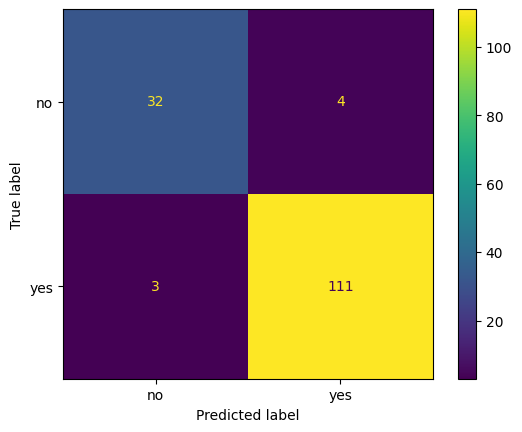

In [534]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, catboost_test_preds, labels=catboost_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['no', 'yes'])
disp.plot();